In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-05-28 00:10:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2020-05-28 00:10:29 (1.11 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [6]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)
#so cdf is just a few features we want to pick out...

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


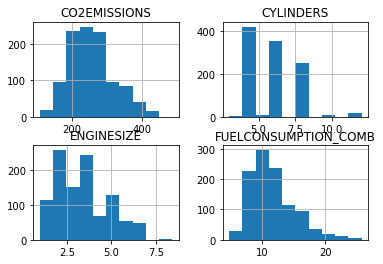

In [9]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS',"FUELCONSUMPTION_COMB"]];
viz.hist()
plt.show()
#so we can put the fields we want in some table thingy?? idk why double brackets.
#and we can operate on a column basis...

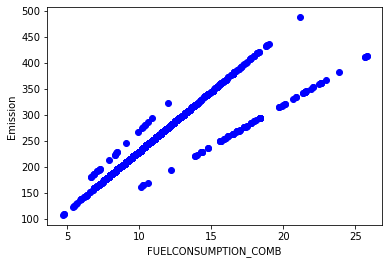

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()
#so we are plotting fuel consumption against emissions

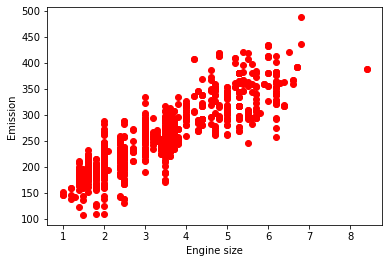

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

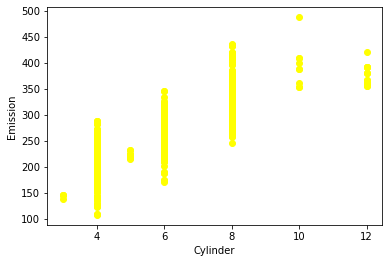

In [12]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color  ='yellow')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

In [13]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]
#randomly splits train and test. 80% is training
#what is a mask? explore how exactly does this work?

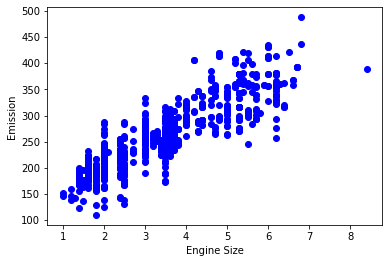

In [14]:
#Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [15]:
#using sklean package to model data
from sklearn import linear_model
regr = linear_model.LinearRegression()#our model. think of as an object or black box
#Ok they gotta explain what np.asanyarray does....
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
#The coefficeints
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [[39.4064883]]
Intercept:  [125.74847036]


Text(0, 0.5, 'Emission')

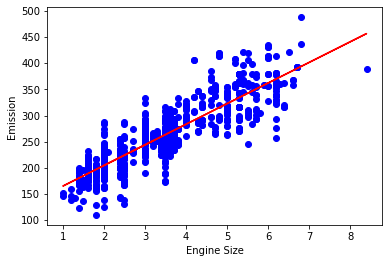

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')#just scatterplot points
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
#plt.plot(train_x , 10*train_x + 150, '-y')#the flag is just color of line.
#the best fit line. notice the form y = mx + b. Not sure why regr.coef is a 2D array but seems like they just store the stuffl ike that
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [20]:
#Evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


Mean absolute error: 23.33
Residual sum of squares (MSE): 890.53
R2-score: 0.73


In [37]:
test_data = np.asanyarray(test[['ENGINESIZE']])
test_actual = np.asanyarray(test[['CO2EMISSIONS']])
test_results = regr.predict(test_data)
for result in range(0, len(test_results)):
    print("Predicted: %.2f  Actual: %.2f" % (test_results[result], test_actual[result]))
    
    
print(regr.predict([[10]])) 

Predicted: 358.25  Actual: 359.00
Predicted: 204.56  Actual: 230.00
Predicted: 243.97  Actual: 262.00
Predicted: 283.37  Actual: 297.00
Predicted: 204.56  Actual: 193.00
Predicted: 204.56  Actual: 181.00
Predicted: 204.56  Actual: 193.00
Predicted: 204.56  Actual: 200.00
Predicted: 204.56  Actual: 209.00
Predicted: 204.56  Actual: 209.00
Predicted: 243.97  Actual: 228.00
Predicted: 204.56  Actual: 209.00
Predicted: 243.97  Actual: 221.00
Predicted: 243.97  Actual: 230.00
Predicted: 243.97  Actual: 228.00
Predicted: 299.14  Actual: 292.00
Predicted: 243.97  Actual: 214.00
Predicted: 299.14  Actual: 292.00
Predicted: 299.14  Actual: 338.00
Predicted: 299.14  Actual: 317.00
Predicted: 204.56  Actual: 230.00
Predicted: 299.14  Actual: 370.00
Predicted: 204.56  Actual: 200.00
Predicted: 180.92  Actual: 212.00
Predicted: 204.56  Actual: 225.00
Predicted: 204.56  Actual: 246.00
Predicted: 204.56  Actual: 221.00
Predicted: 267.61  Actual: 262.00
Predicted: 267.61  Actual: 260.00
Predicted: 370